# Predict the percentage of an student based on the no. of study hours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.isnull().count()

Hours     25
Scores    25
dtype: int64

In [4]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

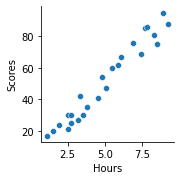

In [5]:
sns.pairplot(data=df,x_vars="Hours",y_vars="Scores")

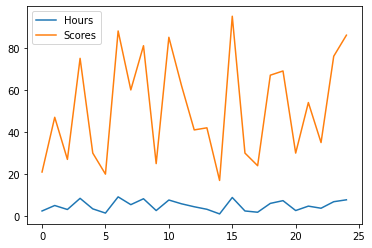

In [6]:
df.plot()

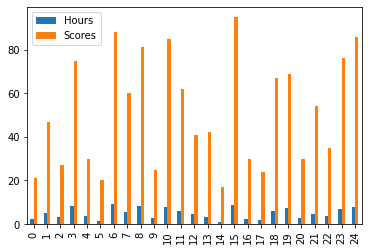

In [7]:
df.plot.bar()

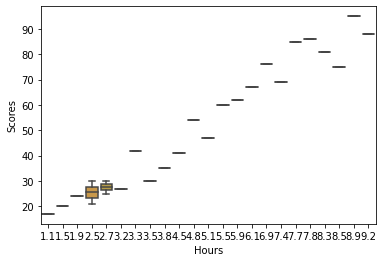

In [8]:
sns.boxplot(data=df,x="Hours",y="Scores")

In [9]:
from scipy.stats import skew

In [10]:
skew(df["Scores"])

0.21968605283072445

In [11]:
feature=df.iloc[:, :-1]
target=df.iloc[:, -1]

print(f"feature:{feature}  target:{target}")

feature:    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8  target:0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature,target, test_size=0.3, random_state=1)

In [13]:
xtrain

,Hours
4,3.5
2,3.2
20,2.7
6,9.2
7,5.5
22,3.8
1,5.1
16,2.5
0,2.5
15,8.9


In [14]:
ytrain

4     30
2     27
20    30
6     88
7     60
22    35
1     47
16    30
0     21
15    95
24    86
23    76
9     25
8     81
12    41
11    62
5     20
Name: Scores, dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(xtest,ypred)
mse=mean_squared_error(xtest,ypred)
r2=r2_score(xtest,ypred)
rmse=np.sqrt(mse)

print(f"mean_absolute_error:{mae}\nmean_squared_error:{mse}\nr2_score:{r2} \nroot_ mean_sq_error: {rmse}")

mean_absolute_error:46.48256891663291
mean_squared_error:2760.4180684982693
r2_score:-406.5921843482125 
root_ mean_sq_error: 52.53968089452266


In [17]:
train = linreg.score(xtrain, ytrain)
test = linreg.score(xtest, ytest)

print(f"training score: {train}\n testing score:{test}")

training score: 0.9681980033905908
 testing score:0.8933827573294114


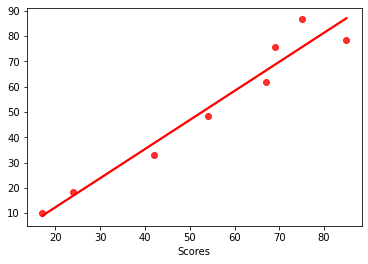

In [18]:
sns.regplot(x=ytest,y=ypred,ci=None,color ='red');

In [19]:
from sklearn.linear_model import Lasso , Ridge



In [20]:
for i in range(10,100):
  l2=Ridge(alpha=i)
  l2.fit(xtrain,ytrain)
  ypred_l2=l2.predict(xtest)
  train = l2.score(xtrain, ytrain)
  test = l2.score(xtest, ytest)

  print(f"{i},{train}, {test}")

10,0.9600121611940016, 0.9253727565193056
11,0.9584728021405546, 0.9270913991505901
12,0.9568322642188994, 0.9285926881737471
13,0.9550966948188961, 0.9298874151597302
14,0.9532719026051755, 0.9309858145629116
15,0.9513633776617356, 0.9318975958017655
16,0.9493763103108449, 0.9326319732686558
17,0.9473156087027512, 0.9331976944175553
18,0.9451859152649763, 0.9336030660667174
19,0.9429916220929253, 0.9338559790425562
20,0.9407368853571078, 0.9339639312811246
21,0.9384256387963772, 0.9339340494945861
22,0.9360616063612206, 0.9337731095018206
23,0.9336483140661973, 0.9334875553147524
24,0.9311891011061166, 0.9330835170650646
25,0.9286871302864025, 0.9325668278496125
26,0.9261453978143047, 0.9319430395670141
27,0.9235667424941243, 0.9312174378125461
28,0.9209538543664266, 0.9303950558935437
29,0.9183092828282715, 0.9294806880229783
30,0.9156354442687836, 0.9284789017447171
31,0.9129346292518998, 0.9273940496401305
32,0.9102090092758319, 0.926230280362177
33,0.9074606431366758, 0.9249915490

In [21]:
l2=Ridge(alpha=23)
l2.fit(xtrain,ytrain)
ypred_l2=l2.predict(xtest)

In [22]:
train = l2.score(xtrain, ytrain)
test = l2.score(xtest, ytest)
print(f"training score: {train}\n testing score:{test}")

training score: 0.9336483140661973
 testing score:0.9334875553147524


In [23]:
mae=mean_absolute_error(xtest,ypred_l2)
mse=mean_squared_error(xtest,ypred_l2)
r2=r2_score(xtest,ypred_l2)
rmse=np.sqrt(mse)

print(f"mean_absolute_error:{mae}\nmean_squared_error:{mse}\nr2_score:{r2} \nroot_ mean_sq_error: {rmse}")

mean_absolute_error:46.22806400494724
mean_squared_error:2512.332568606297
r2_score:-369.9608813003023 
root_ mean_sq_error: 50.12317396779954


In [24]:
testing= pd.DataFrame({'Actual': ytest, 'Predicted': ypred_l2})  
testing

,Actual,Predicted
14,17,17.551540
13,42,36.128628
17,24,24.306845
3,75,80.038109
21,54,48.794825
10,85,73.282804
18,67,59.772195
19,69,70.749565


In [25]:
def predictscore(hours):
  newobs=[[hours]]
  ypred=l2.predict(newobs)[0]
  print(f"score with refernce to the study hours will be -: {ypred:.2f}")
  return(ypred)



In [26]:
predictscore(90)

score with refernce to the study hours will be -: 768.23


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


768.234781432381

In [27]:
def mymodel(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)

  te=model.score(xtest,ytest)
  tr=model.score(xtrain,ytrain)

  def predictscore(hours):
   newobs=[[hours]]
   ypred=model.predict(newobs)[0]
   print(f"score with refernce to the study hours will be -: {ypred:.2f}")
   return(ypred)

  print(f"test accuracy is: {te}\ntrain accuracy i :{tr}\nmodel_predicted accuracy is :{ypred}")
  return model

In [28]:
mymodel(LinearRegression())
predictscore(12)


test accuracy is: 0.8933827573294114
train accuracy i :0.9681980033905908
model_predicted accuracy is :[ 9.93952968 32.84320126 18.26813752 86.97915227 48.45934097 78.65054442
 61.99332873 75.52731648]
score with refernce to the study hours will be -: 109.59


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


109.59256754145247

In [29]:
from sklearn.neighbors import KNeighborsRegressor


In [31]:
mymodel(KNeighborsRegressor(n_neighbors=8))
predictscore(9.25)

test accuracy is: 0.8543368180333224
train accuracy i :0.9090560583124042
model_predicted accuracy is :[27.25  29.875 27.25  74.375 40.875 74.375 61.    74.375]
score with refernce to the study hours will be -: 86.37


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


86.37120743632357